<a href="https://colab.research.google.com/github/sandeeppalakkal/ML_Datascience_Practice/blob/master/Iris_classification_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
tf.enable_eager_execution()

In [0]:
import os
import matplotlib.pyplot as plt
%matplotlib inline

### Get data

In [6]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"
train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                          origin=train_dataset_url)
print("Downloaded to: {:s}".format(train_dataset_fp))

Downloaded to: /root/.keras/datasets/iris_training.csv


In [8]:
!head -n5 {train_dataset_fp}

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0


In [0]:
# Labels
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

In [10]:
# make training dataset
batch_size = 32

train_dataset = tf.contrib.data.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names = column_names,
    label_name = label_name,
    num_epochs=1)

W0621 00:12:53.197151 139973603018624 deprecation.py:323] From <ipython-input-10-cb6a874b790c>:8: make_csv_dataset (from tensorflow.contrib.data.python.ops.readers) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.data.experimental.make_csv_dataset(...)`.
W0621 00:12:53.342396 139973603018624 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/data/experimental/ops/readers.py:499: parallel_interleave (from tensorflow.python.data.experimental.ops.interleave_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_determinstic`.


In [11]:
print(type(train_dataset))

<class 'tensorflow.python.data.ops.dataset_ops.DatasetV1Adapter'>


In [13]:
# Iterate over batches
features,labels = next(iter(train_dataset))
print(labels)
print(features)

tf.Tensor([2 2 2 0 1 0 1 1 0 0 2 0 2 0 1 0 0 1 1 2 1 0 0 2 1 1 2 2 1 2 2 0], shape=(32,), dtype=int32)
OrderedDict([('sepal_length', <tf.Tensor: id=65, shape=(32,), dtype=float32, numpy=
array([6.7, 6.8, 6.3, 5.2, 5.8, 5.4, 5.8, 6. , 4.6, 5.4, 6.7, 5.7, 6.4,
       5.1, 6.7, 4.9, 4.6, 5.6, 5.2, 6.2, 5.5, 5.7, 5.3, 7.2, 4.9, 5.7,
       6.4, 6.9, 5.7, 7.3, 5.8, 4.9], dtype=float32)>), ('sepal_width', <tf.Tensor: id=66, shape=(32,), dtype=float32, numpy=
array([3. , 3.2, 3.4, 3.4, 2.6, 3.7, 2.7, 2.9, 3.1, 3.9, 3.1, 4.4, 3.1,
       3.7, 3.1, 3.1, 3.4, 2.7, 2.7, 3.4, 2.4, 3.8, 3.7, 3. , 2.4, 3. ,
       2.8, 3.1, 2.8, 2.9, 2.8, 3.1], dtype=float32)>), ('petal_length', <tf.Tensor: id=63, shape=(32,), dtype=float32, numpy=
array([5.2, 5.9, 5.6, 1.4, 4. , 1.5, 4.1, 4.5, 1.5, 1.3, 5.6, 1.5, 5.5,
       1.5, 4.4, 1.5, 1.4, 4.2, 3.9, 5.4, 3.7, 1.7, 1.5, 5.8, 3.3, 4.2,
       5.6, 5.1, 4.5, 6.3, 5.1, 1.5], dtype=float32)>), ('petal_width', <tf.Tensor: id=64, shape=(32,), dtype=float32, numpy=
ar

In [14]:
# Iterate over batches
features,labels = next(iter(train_dataset))
print(labels)
print(features)

tf.Tensor([2 2 2 0 1 0 1 1 0 0 2 0 2 0 1 0 0 1 1 2 1 0 0 2 1 1 2 2 1 2 2 0], shape=(32,), dtype=int32)
OrderedDict([('sepal_length', <tf.Tensor: id=80, shape=(32,), dtype=float32, numpy=
array([6.7, 6.8, 6.3, 5.2, 5.8, 5.4, 5.8, 6. , 4.6, 5.4, 6.7, 5.7, 6.4,
       5.1, 6.7, 4.9, 4.6, 5.6, 5.2, 6.2, 5.5, 5.7, 5.3, 7.2, 4.9, 5.7,
       6.4, 6.9, 5.7, 7.3, 5.8, 4.9], dtype=float32)>), ('sepal_width', <tf.Tensor: id=81, shape=(32,), dtype=float32, numpy=
array([3. , 3.2, 3.4, 3.4, 2.6, 3.7, 2.7, 2.9, 3.1, 3.9, 3.1, 4.4, 3.1,
       3.7, 3.1, 3.1, 3.4, 2.7, 2.7, 3.4, 2.4, 3.8, 3.7, 3. , 2.4, 3. ,
       2.8, 3.1, 2.8, 2.9, 2.8, 3.1], dtype=float32)>), ('petal_length', <tf.Tensor: id=78, shape=(32,), dtype=float32, numpy=
array([5.2, 5.9, 5.6, 1.4, 4. , 1.5, 4.1, 4.5, 1.5, 1.3, 5.6, 1.5, 5.5,
       1.5, 4.4, 1.5, 1.4, 4.2, 3.9, 5.4, 3.7, 1.7, 1.5, 5.8, 3.3, 4.2,
       5.6, 5.1, 4.5, 6.3, 5.1, 1.5], dtype=float32)>), ('petal_width', <tf.Tensor: id=79, shape=(32,), dtype=float32, numpy=
ar

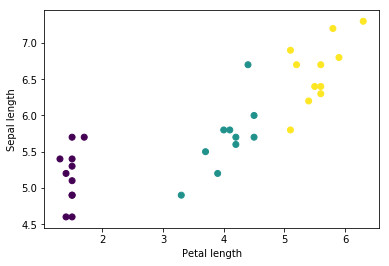

In [15]:
# Feature visualization

plt.scatter(features['petal_length'].numpy(),
            features['sepal_length'].numpy(),
            c=labels.numpy(),
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length");

In [0]:
# Create data tensor from training dataset for training
def pack_features_vector(features, labels):
  """Pack the features into a single array."""
  features = tf.stack(list(features.values()), axis=1)
  return features, labels

In [19]:
print(pack_features_vector(features,labels)[0][:5])
print(pack_features_vector(features,labels)[1][:5])

tf.Tensor(
[[6.7 3.  5.2 2.3]
 [6.8 3.2 5.9 2.3]
 [6.3 3.4 5.6 2.4]
 [5.2 3.4 1.4 0.2]
 [5.8 2.6 4.  1.2]], shape=(5, 4), dtype=float32)
tf.Tensor([2 2 2 0 1], shape=(5,), dtype=int32)


In [0]:
# pack both features & labels into pair of training samples
train_dataset = train_dataset.map(pack_features_vector)

In [22]:
features, labels = next(iter(train_dataset))

print(features[:5])
print(labels[:5])
print(features.shape)

tf.Tensor(
[[6.7 3.  5.2 2.3]
 [6.8 3.2 5.9 2.3]
 [6.3 3.4 5.6 2.4]
 [5.2 3.4 1.4 0.2]
 [5.8 2.6 4.  1.2]], shape=(5, 4), dtype=float32)
tf.Tensor([2 2 2 0 1], shape=(5,), dtype=int32)
(32, 4)


### Model

In [0]:
# using keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation=tf.nn.relu,input_shape=(4,)),
    tf.keras.layers.Dense(10,activation=tf.nn.relu),
    tf.keras.layers.Dense(3)
])

In [31]:
# predicting with above model
predictions = model(features[:5])
print("Model output")
print(predictions)
print("Softmax output")
print(tf.nn.softmax(predictions))
print("Argmax of softmax output")
print(tf.argmax(tf.nn.softmax(predictions),axis=1))

Model output
tf.Tensor(
[[-1.2204016   1.4775428  -3.4498956 ]
 [-1.3046824   1.536958   -3.3713946 ]
 [-1.3187455   1.4565195  -3.0827146 ]
 [-0.93213165  1.4983323  -3.533815  ]
 [-0.9817296   1.4050457  -3.2383776 ]], shape=(5, 3), dtype=float32)
Softmax output
tf.Tensor(
[[0.06266936 0.9305884  0.00674215]
 [0.05473313 0.9383375  0.00692929]
 [0.05809143 0.9319537  0.00995474]
 [0.08039684 0.9136418  0.00596132]
 [0.08345113 0.90781146 0.00873741]], shape=(5, 3), dtype=float32)
Argmax of softmax output
tf.Tensor([1 1 1 1 1], shape=(5,), dtype=int64)


### Model Training

In [0]:
# Loss
def loss(model,x,y):
  y_ = model(x)
  return tf.losses.sparse_softmax_cross_entropy(labels=y,logits=y_)

In [34]:
print(loss(model,features,labels))

tf.Tensor(2.5965037, shape=(), dtype=float32)


In [0]:
# gradient calculation
def grad(model,inputs,targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model,inputs,targets)
  return loss_value, tape.gradient(loss_value,model.trainable_variables)

In [0]:
# Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
global_step = tf.Variable(0)

In [42]:
# Single optimization step for illustration
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(global_step.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables), global_step)

print("Step: {},         Loss: {}".format(global_step.numpy(),
                                          loss(model, features, labels).numpy()))
print("Gradient should be reducing")

Step: 1, Initial Loss: 2.0247108936309814
Step: 2,         Loss: 1.6634857654571533
Gradient should be reducing


In [43]:
# Train in a loop
from tensorflow import contrib
tfe = contrib.eager

# keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tfe.metrics.Mean()
  epoch_accuracy = tfe.metrics.Accuracy()

  # Training loop - using batches of 32
  for x, y in train_dataset:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables),
                              global_step)

    # Track progress
    epoch_loss_avg(loss_value)  # add current batch loss
    # compare predicted label to actual label
    epoch_accuracy(tf.argmax(model(x), axis=1, output_type=tf.int32), y)

  # end epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())
  
  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))


Epoch 000: Loss: 1.391, Accuracy: 30.000%
Epoch 050: Loss: 0.356, Accuracy: 92.500%
Epoch 100: Loss: 0.227, Accuracy: 97.500%
Epoch 150: Loss: 0.165, Accuracy: 96.667%
Epoch 200: Loss: 0.136, Accuracy: 96.667%


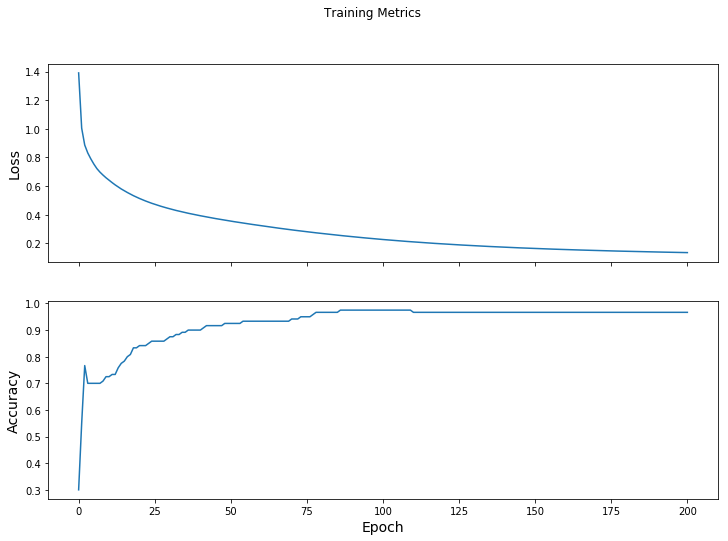

In [44]:
# Visualization of training
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results);

### Model Evaluation

In [45]:
# download test data
test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


In [0]:
# Set up
test_dataset = tf.contrib.data.make_csv_dataset(
    test_fp,
    batch_size, 
    column_names=column_names,
    label_name='species',
    num_epochs=1,
    shuffle=False)

test_dataset = test_dataset.map(pack_features_vector)

In [47]:
# Evaluation
test_accuracy = tfe.metrics.Accuracy()

for (x, y) in test_dataset:
  logits = model(x)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 96.667%


In [48]:
tf.stack([y,prediction],axis=1)

<tf.Tensor: id=106184, shape=(30, 2), dtype=int32, numpy=
array([[1, 1],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [2, 2],
       [1, 1],
       [2, 2],
       [2, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1]], dtype=int32)>

In [53]:
# confusion matrix
conf_mat = tf.math.confusion_matrix(y,prediction)
print(conf_mat)

tf.Tensor(
[[ 8  0  0]
 [ 0 13  1]
 [ 0  0  8]], shape=(3, 3), dtype=int32)


### Prediction using Model

In [49]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

predictions = model(predict_dataset)

for i, logits in enumerate(predictions):
  class_idx = tf.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
  print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

Example 0 prediction: Iris setosa (97.7%)
Example 1 prediction: Iris versicolor (91.4%)
Example 2 prediction: Iris virginica (77.4%)
